<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Logica_Difusa/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [3]:
#Nossas variaveis linguisticas
crises = ctrl.Antecedent(np.arange(0,101,1),'crises')
saba= ctrl.Antecedent(np.arange(0,101,1),'saba')
debito_expiratorio = ctrl.Antecedent(np.arange(0,101,1),'debito_expiratorio')
gravidade = ctrl.Consequent(np.arange(0,101,1),'gravidade')


In [4]:
crises.automf(names=['semanal','diario','continuo'])
saba.automf(names=['semanal','diario','continuo'])
debito_expiratorio.automf(names=['50-80','33-55','menos_33'])
gravidade.automf(names=['moderada','aguda_grave','risco_vida'])

#Funcoes de pertinencia, usaremos a trapezoidal para todas menos a gravidade que sera triangular

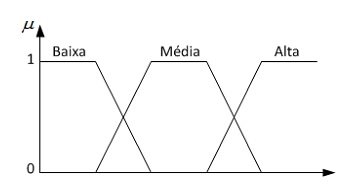

In [13]:
#Funcoes de pertinencia
crises['semanal'] = fuzz.trapmf(crises.universe,[0,0,30,50])
crises['diario'] = fuzz.trapmf(crises.universe,[30,50,70,90])
crises['continuo'] = fuzz.trapmf(crises.universe,[80,90,100,100])


saba['semanal'] = fuzz.trapmf(saba.universe,[0,0,20,40])
saba['diario'] = fuzz.trapmf(saba.universe,[20,40,60,80])
saba['continuo'] = fuzz.trapmf(saba.universe,[80,90,100,100])

debito_expiratorio['50-80'] = fuzz.trapmf(debito_expiratorio.universe,[0,0,20,40])
debito_expiratorio['33-55'] = fuzz.trapmf(debito_expiratorio.universe,[20,40,60,80])
debito_expiratorio['menos_33'] = fuzz.trapmf(debito_expiratorio.universe,[80,90,100,100])


#Funcao triangular
gravidade['moderada'] = fuzz.trimf(gravidade.universe,[0,30,60])
gravidade['aguda_grave'] = fuzz.trimf(gravidade.universe,[30,60,85])
gravidade['risco_vida'] = fuzz.trimf(gravidade.universe,[90,100,100])


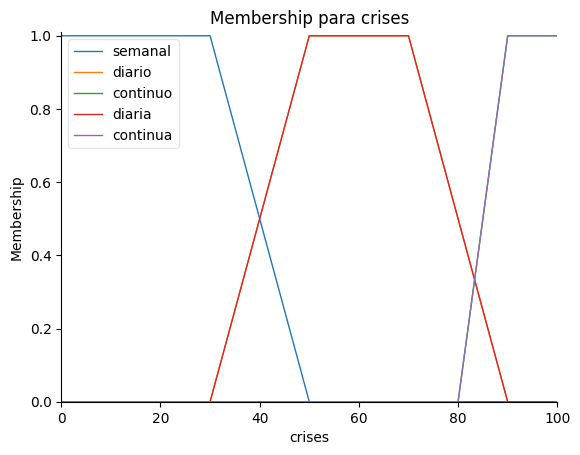

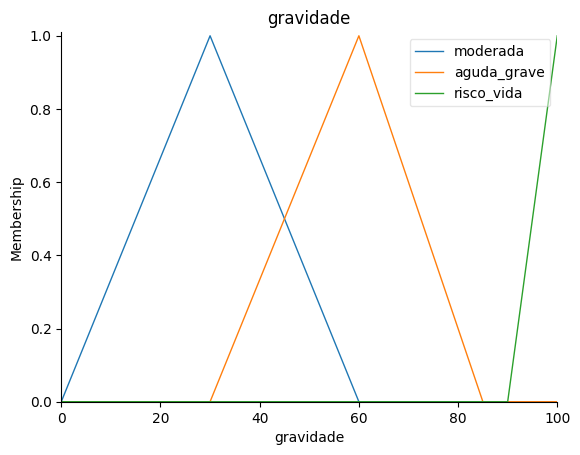

In [20]:
#Vamos visualiza-los agora


crises.view()
plt.title('Membership para crises')


gravidade.view()
plt.title('gravidade')
plt.show()

In [22]:
regra1= ctrl.Rule(crises['semanal'] | saba['semanal'] | debito_expiratorio['50-80'], gravidade['moderada'])
regra2= ctrl.Rule(crises['diario'] | saba['diario'] | debito_expiratorio['33-55'], gravidade['aguda_grave'])
regra3= ctrl.Rule(crises['continuo'] | saba['continuo'] | debito_expiratorio['menos_33'], gravidade['risco_vida'])

In [24]:
asma_ctrl = ctrl.ControlSystem([regra1,regra2,regra3]) # Podemos ter mais regras
asma = ctrl.ControlSystemSimulation(asma_ctrl) #Criacao do modelo



In [31]:
asma.input['crises'] = 80
asma.input['saba']= 80
asma.input['debito_expiratorio'] = 100
asma.compute() #compute faz o processo de debuzz

resultado_gravidade = asma.output['gravidade']
print('gravidadade da asma' , resultado_gravidade)


if 0<= resultado_gravidade < 60:
  print('Gravidade Moderada')

elif 60<= resultado_gravidade < 90:
  print('Gravidade Aguda grave')

else:
  print('Gravidade risco de vida')

gravidadade da asma 65.58943089430896
Gravidade Aguda grave
